## 배치 정규화
- 가중치 초깃값을 적절하게 설정하면 각 층의 활성화 값 분포가 적당히 퍼지는 모습
- 각 층의 활성화 값이 적당히 퍼지도록 하는 배치 정규화

In [2]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [3]:
# MNIST 데이터 가져오기

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True)

# 학습데이터 줄이기
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0] # 1000
batch_size = 100
lr_rate = 0.01

In [4]:
def __train(weight_init_std):
    
    # 배치 정규화 적용
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size = 10,weight_init_std=weight_init_std, use_batchnorm = True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size = 10,weight_init_std=weight_init_std, use_batchnorm = False)
    
    optimizer = SGD(lr=lr_rate)
    
    train_acc_lst = []
    bn_train_acc_lst = []
    
    iter_per_epoch = max(train_size / batch_size,1) # 1epoch 마다 100번 반복
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size,batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        for _network in (bn_network,network):
            grads = _network.gradient(x_batch,t_batch)
            optimizer.update(_network.params,grads)
            
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train,t_train)
            bn_train_acc = bn_network.accuracy(x_train,t_train)
            
            train_acc_lst.append(train_acc)
            bn_train_acc_lst.append(bn_train_acc)
            
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
            
            epoch_cnt+=1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_lst,bn_train_acc_lst

In [5]:
# 그래프 그리기

weight_scale_lst = np.logspace(0,-4,num=16)
x = np.arange(max_epochs)

In [6]:
weight_scale_lst

array([1.00000000e+00, 5.41169527e-01, 2.92864456e-01, 1.58489319e-01,
       8.57695899e-02, 4.64158883e-02, 2.51188643e-02, 1.35935639e-02,
       7.35642254e-03, 3.98107171e-03, 2.15443469e-03, 1.16591440e-03,
       6.30957344e-04, 3.41454887e-04, 1.84784980e-04, 1.00000000e-04])

============== 1/16 ==============
epoch:0 | 0.117 - 0.116


C:\Users\김유빈\Untitled Folder\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\김유빈\Untitled Folder\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.115
epoch:2 | 0.097 - 0.111
epoch:3 | 0.097 - 0.161
epoch:4 | 0.097 - 0.183
epoch:5 | 0.097 - 0.203
epoch:6 | 0.097 - 0.207
epoch:7 | 0.097 - 0.23
epoch:8 | 0.097 - 0.248
epoch:9 | 0.097 - 0.27
epoch:10 | 0.097 - 0.281
epoch:11 | 0.097 - 0.313
epoch:12 | 0.097 - 0.319
epoch:13 | 0.097 - 0.328
epoch:14 | 0.097 - 0.358
epoch:15 | 0.097 - 0.362
epoch:16 | 0.097 - 0.373
epoch:17 | 0.097 - 0.384
epoch:18 | 0.097 - 0.41


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.419
============== 2/16 ==============
epoch:0 | 0.105 - 0.077


C:\Users\김유빈\Untitled Folder\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\김유빈\Untitled Folder\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.105
epoch:2 | 0.097 - 0.138
epoch:3 | 0.097 - 0.149
epoch:4 | 0.097 - 0.162
epoch:5 | 0.097 - 0.181
epoch:6 | 0.097 - 0.202
epoch:7 | 0.097 - 0.215
epoch:8 | 0.097 - 0.234
epoch:9 | 0.097 - 0.252
epoch:10 | 0.097 - 0.28
epoch:11 | 0.097 - 0.303
epoch:12 | 0.097 - 0.321
epoch:13 | 0.097 - 0.337
epoch:14 | 0.097 - 0.349
epoch:15 | 0.097 - 0.387
epoch:16 | 0.097 - 0.394
epoch:17 | 0.097 - 0.411
epoch:18 | 0.097 - 0.425


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.441
============== 3/16 ==============
epoch:0 | 0.118 - 0.107
epoch:1 | 0.383 - 0.092
epoch:2 | 0.533 - 0.118
epoch:3 | 0.651 - 0.147
epoch:4 | 0.683 - 0.188
epoch:5 | 0.732 - 0.229
epoch:6 | 0.789 - 0.258
epoch:7 | 0.838 - 0.305
epoch:8 | 0.88 - 0.33
epoch:9 | 0.899 - 0.38
epoch:10 | 0.926 - 0.421
epoch:11 | 0.946 - 0.446
epoch:12 | 0.955 - 0.484
epoch:13 | 0.968 - 0.515
epoch:14 | 0.977 - 0.538
epoch:15 | 0.979 - 0.561
epoch:16 | 0.984 - 0.583
epoch:17 | 0.987 - 0.596
epoch:18 | 0.988 - 0.62


No handles with labels found to put in legend.


epoch:19 | 0.991 - 0.65
============== 4/16 ==============
epoch:0 | 0.083 - 0.1
epoch:1 | 0.204 - 0.093
epoch:2 | 0.323 - 0.177
epoch:3 | 0.423 - 0.261
epoch:4 | 0.492 - 0.315
epoch:5 | 0.553 - 0.401
epoch:6 | 0.587 - 0.432
epoch:7 | 0.64 - 0.473
epoch:8 | 0.666 - 0.519
epoch:9 | 0.707 - 0.578
epoch:10 | 0.737 - 0.604
epoch:11 | 0.734 - 0.625
epoch:12 | 0.777 - 0.654
epoch:13 | 0.765 - 0.68
epoch:14 | 0.795 - 0.705
epoch:15 | 0.795 - 0.724
epoch:16 | 0.82 - 0.735
epoch:17 | 0.836 - 0.749
epoch:18 | 0.832 - 0.757


No handles with labels found to put in legend.


epoch:19 | 0.838 - 0.772
============== 5/16 ==============
epoch:0 | 0.087 - 0.092
epoch:1 | 0.097 - 0.181
epoch:2 | 0.101 - 0.349
epoch:3 | 0.11 - 0.47
epoch:4 | 0.129 - 0.554
epoch:5 | 0.134 - 0.622
epoch:6 | 0.14 - 0.67
epoch:7 | 0.157 - 0.716
epoch:8 | 0.169 - 0.748
epoch:9 | 0.191 - 0.775
epoch:10 | 0.198 - 0.8
epoch:11 | 0.21 - 0.813
epoch:12 | 0.212 - 0.83
epoch:13 | 0.206 - 0.838
epoch:14 | 0.208 - 0.853
epoch:15 | 0.226 - 0.858
epoch:16 | 0.234 - 0.87
epoch:17 | 0.229 - 0.889
epoch:18 | 0.248 - 0.886


No handles with labels found to put in legend.


epoch:19 | 0.242 - 0.897
============== 6/16 ==============
epoch:0 | 0.1 - 0.119
epoch:1 | 0.1 - 0.187
epoch:2 | 0.092 - 0.464
epoch:3 | 0.091 - 0.607
epoch:4 | 0.103 - 0.7
epoch:5 | 0.143 - 0.742
epoch:6 | 0.124 - 0.768
epoch:7 | 0.117 - 0.784
epoch:8 | 0.117 - 0.807
epoch:9 | 0.117 - 0.826
epoch:10 | 0.117 - 0.842
epoch:11 | 0.117 - 0.86
epoch:12 | 0.117 - 0.868
epoch:13 | 0.117 - 0.878
epoch:14 | 0.117 - 0.895
epoch:15 | 0.117 - 0.903
epoch:16 | 0.117 - 0.914
epoch:17 | 0.117 - 0.924
epoch:18 | 0.117 - 0.934


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.944
============== 7/16 ==============
epoch:0 | 0.099 - 0.112
epoch:1 | 0.116 - 0.251
epoch:2 | 0.116 - 0.532
epoch:3 | 0.116 - 0.651
epoch:4 | 0.117 - 0.74
epoch:5 | 0.117 - 0.786
epoch:6 | 0.117 - 0.836
epoch:7 | 0.117 - 0.872
epoch:8 | 0.116 - 0.905
epoch:9 | 0.116 - 0.919
epoch:10 | 0.116 - 0.936
epoch:11 | 0.116 - 0.953
epoch:12 | 0.116 - 0.969
epoch:13 | 0.116 - 0.972
epoch:14 | 0.116 - 0.98
epoch:15 | 0.116 - 0.987
epoch:16 | 0.116 - 0.989
epoch:17 | 0.116 - 0.993
epoch:18 | 0.117 - 0.994


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.997
============== 8/16 ==============
epoch:0 | 0.116 - 0.094
epoch:1 | 0.116 - 0.404
epoch:2 | 0.116 - 0.67
epoch:3 | 0.116 - 0.787
epoch:4 | 0.116 - 0.857
epoch:5 | 0.117 - 0.889
epoch:6 | 0.117 - 0.931
epoch:7 | 0.117 - 0.946
epoch:8 | 0.117 - 0.96
epoch:9 | 0.117 - 0.97
epoch:10 | 0.117 - 0.98
epoch:11 | 0.116 - 0.985
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999


No handles with labels found to put in legend.


============== 9/16 ==============
epoch:0 | 0.093 - 0.155
epoch:1 | 0.117 - 0.572
epoch:2 | 0.117 - 0.725
epoch:3 | 0.117 - 0.787
epoch:4 | 0.117 - 0.84
epoch:5 | 0.117 - 0.909
epoch:6 | 0.117 - 0.94
epoch:7 | 0.117 - 0.967
epoch:8 | 0.117 - 0.986
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.105 - 0.133
epoch:1 | 0.117 - 0.616
epoch:2 | 0.117 - 0.754
epoch:3 | 0.117 - 0.791
epoch:4 | 0.117 - 0.856
epoch:5 | 0.116 - 0.872
epoch:6 | 0.116 - 0.864
epoch:7 | 0.116 - 0.886
epoch:8 | 0.116 - 0.891
epoch:9 | 0.116 - 0.9
epoch:10 | 0.117 - 0.904
epoch:11 | 0.117 - 0.902
epoch:12 | 0.117 - 0.904
epoch:13 | 0.117 - 0.923
epoch:14 | 0.117 - 0.915
epoch:15 | 0.117 - 0.95
epoch:16 | 0.117 - 0.962
epoch:17 | 0.117 - 0.951
epoch:18 | 0.117 - 0.967


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.988
============== 11/16 ==============
epoch:0 | 0.087 - 0.177
epoch:1 | 0.117 - 0.601
epoch:2 | 0.117 - 0.8
epoch:3 | 0.117 - 0.832
epoch:4 | 0.117 - 0.901
epoch:5 | 0.117 - 0.916
epoch:6 | 0.117 - 0.945
epoch:7 | 0.117 - 0.947
epoch:8 | 0.117 - 0.961
epoch:9 | 0.117 - 0.972
epoch:10 | 0.117 - 0.974
epoch:11 | 0.117 - 0.968
epoch:12 | 0.117 - 0.951
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.993
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.976
epoch:17 | 0.117 - 0.994
epoch:18 | 0.117 - 0.995


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.995
============== 12/16 ==============
epoch:0 | 0.105 - 0.113
epoch:1 | 0.117 - 0.539
epoch:2 | 0.117 - 0.557
epoch:3 | 0.117 - 0.6
epoch:4 | 0.117 - 0.602
epoch:5 | 0.117 - 0.616
epoch:6 | 0.117 - 0.624
epoch:7 | 0.117 - 0.468
epoch:8 | 0.117 - 0.639
epoch:9 | 0.117 - 0.625
epoch:10 | 0.116 - 0.614
epoch:11 | 0.116 - 0.617
epoch:12 | 0.116 - 0.668
epoch:13 | 0.116 - 0.682
epoch:14 | 0.116 - 0.705
epoch:15 | 0.116 - 0.713
epoch:16 | 0.116 - 0.718
epoch:17 | 0.116 - 0.802
epoch:18 | 0.116 - 0.799
epoch:19 | 0.116 - 0.804


No handles with labels found to put in legend.


============== 13/16 ==============
epoch:0 | 0.105 - 0.102
epoch:1 | 0.117 - 0.488
epoch:2 | 0.116 - 0.588
epoch:3 | 0.116 - 0.598
epoch:4 | 0.116 - 0.644
epoch:5 | 0.116 - 0.617
epoch:6 | 0.116 - 0.664
epoch:7 | 0.116 - 0.687
epoch:8 | 0.116 - 0.696
epoch:9 | 0.116 - 0.683
epoch:10 | 0.116 - 0.71
epoch:11 | 0.116 - 0.742
epoch:12 | 0.116 - 0.697
epoch:13 | 0.116 - 0.723
epoch:14 | 0.116 - 0.804
epoch:15 | 0.116 - 0.805
epoch:16 | 0.116 - 0.807
epoch:17 | 0.116 - 0.818
epoch:18 | 0.116 - 0.79


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.812
============== 14/16 ==============
epoch:0 | 0.117 - 0.14
epoch:1 | 0.116 - 0.39
epoch:2 | 0.117 - 0.45
epoch:3 | 0.117 - 0.471
epoch:4 | 0.117 - 0.494
epoch:5 | 0.117 - 0.497
epoch:6 | 0.117 - 0.476
epoch:7 | 0.117 - 0.514
epoch:8 | 0.116 - 0.527
epoch:9 | 0.116 - 0.574
epoch:10 | 0.116 - 0.633
epoch:11 | 0.116 - 0.662
epoch:12 | 0.116 - 0.642
epoch:13 | 0.116 - 0.665
epoch:14 | 0.116 - 0.676
epoch:15 | 0.116 - 0.67
epoch:16 | 0.116 - 0.667
epoch:17 | 0.116 - 0.678
epoch:18 | 0.117 - 0.64
epoch:19 | 0.117 - 0.684

No handles with labels found to put in legend.



============== 15/16 ==============
epoch:0 | 0.116 - 0.177
epoch:1 | 0.116 - 0.276
epoch:2 | 0.116 - 0.285
epoch:3 | 0.116 - 0.47
epoch:4 | 0.116 - 0.478
epoch:5 | 0.116 - 0.494
epoch:6 | 0.116 - 0.504
epoch:7 | 0.116 - 0.49
epoch:8 | 0.116 - 0.515
epoch:9 | 0.116 - 0.518
epoch:10 | 0.116 - 0.513
epoch:11 | 0.116 - 0.518
epoch:12 | 0.116 - 0.519
epoch:13 | 0.116 - 0.521
epoch:14 | 0.116 - 0.522
epoch:15 | 0.116 - 0.522
epoch:16 | 0.116 - 0.52
epoch:17 | 0.116 - 0.521
epoch:18 | 0.116 - 0.522


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.517
============== 16/16 ==============
epoch:0 | 0.117 - 0.198
epoch:1 | 0.116 - 0.28
epoch:2 | 0.116 - 0.312
epoch:3 | 0.116 - 0.316
epoch:4 | 0.116 - 0.315
epoch:5 | 0.116 - 0.402
epoch:6 | 0.116 - 0.42
epoch:7 | 0.117 - 0.415
epoch:8 | 0.117 - 0.417
epoch:9 | 0.117 - 0.419
epoch:10 | 0.117 - 0.419
epoch:11 | 0.117 - 0.424
epoch:12 | 0.117 - 0.423
epoch:13 | 0.117 - 0.431
epoch:14 | 0.116 - 0.425
epoch:15 | 0.116 - 0.428
epoch:16 | 0.116 - 0.428
epoch:17 | 0.116 - 0.431
epoch:18 | 0.116 - 0.426
epoch:19 | 0.116 - 0.429


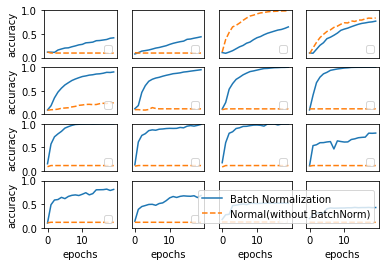

In [11]:
for i,w in enumerate(weight_scale_lst):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_lst, bn_train_acc_lst = __train(w)
    
    plt.subplot(4,4,i+1)
    #plt.title("W:" + str(w)) # 가중치의 표준편차에 따라서 그래프 그려주기
    
    if i == 15:
        plt.plot(x, bn_train_acc_lst, label = "Batch Normalization", markevery = 2)
        plt.plot(x, train_acc_lst, linestyle = "--",label = "Normal(without BatchNorm)", markevery = 2)
        
    else:
        plt.plot(x, bn_train_acc_lst, markevery = 2)
        plt.plot(x, train_acc_lst, linestyle = "--", markevery = 2)
        
    plt.ylim(0,1.0)
    
    if i % 4:
        plt.yticks([]) # 눈금 표시해주기
    else:
        plt.ylabel("accuracy")
        
    if i < 12:
        plt.xticks([]) # 눈금 표시해주기
        
    else:
        plt.xlabel("epochs")
    plt.legend(loc="lower right")
    
plt.show()